In [1]:
import h5py
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import math 
import os 
import json
import matplotlib.patches as patches 
from PIL import Image 

In [2]:
#name = '3CKCA'
#position = [224, 420]

name = '1PVGA'
position = [101, 202] 

In [3]:
with open('../data/full_seq_dict.json', "r") as json_file:
    seq_dict = json.load(json_file)

In [4]:
len(seq_dict[name])

418

In [5]:
#results_path = '../results/pair_100_outward_wbos_eos_randommask_test.hdf5'
results_path = '../../high_gremline_mask_100_outward_wbos_eos.hdf5'

In [6]:
ori_contact_full = np.load('../../selected_gremlin_high_v1/TM_len_filtered_esm2_contact/contacts_' + name + '.npy')

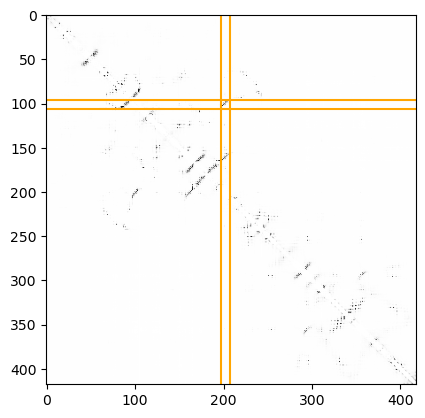

In [9]:
plt.imshow(ori_contact_full,cmap="Greys",vmin=0,vmax=1)
plt.axhline(position[0]-5-0.5, color='orange')
plt.axhline(position[0]+5 + 0.5, color='orange')

plt.axvline(position[1]-5-0.5, color='orange')
plt.axvline(position[1]+ 5 + 0.5, color='orange')

#3ckc
#plt.xlim(210 - 60, 430 + 60) 
#plt.ylim(430 + 60, 210 - 60)

plt.show()

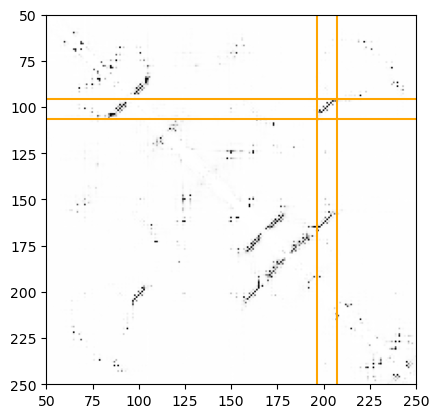

In [12]:
plt.imshow(ori_contact_full,cmap="Greys",vmin=0,vmax=1)
plt.axhline(position[0]-5-0.5, color='orange')
plt.axhline(position[0]+5 + 0.5, color='orange')

plt.axvline(position[1]-5-0.5, color='orange')
plt.axvline(position[1]+ 5 + 0.5, color='orange')

#plt.xlim(210 - 60, 430 + 60) 
#plt.ylim(430 + 60, 210 - 60)

plt.xlim(50, 250) 
plt.ylim(250, 50)

plt.show()

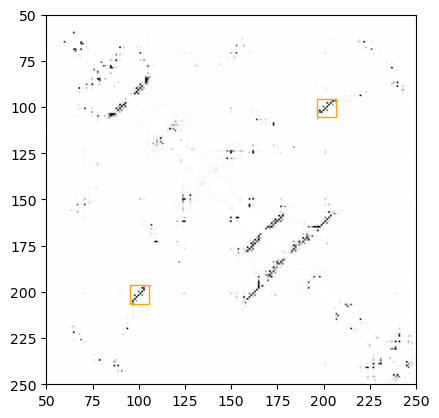

In [14]:
fig, ax = plt.subplots()
ax.imshow(ori_contact_full,cmap="Greys",vmin=0,vmax=1)

plt.xlim(50, 250) 
plt.ylim(250, 50)


rect1 = patches.Rectangle((position[1]-5-0.5, position[0]-5-0.5), 10, 10, linewidth=1, 
                         edgecolor='orange', facecolor="none") 

rect2 = patches.Rectangle((position[0]-5-0.5, position[1]-5-0.5), 10, 10, linewidth=1, 
                         edgecolor='orange', facecolor="none") 


# Add the patch to the Axes 
ax.add_patch(rect1) 
ax.add_patch(rect2)  
plt.savefig("../figures_manuscript/" + name + "_esm2contact_ori_crop.svg")
plt.show() 

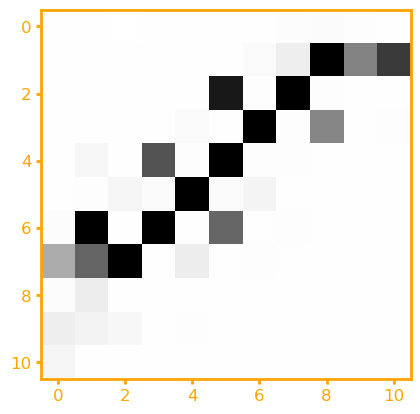

In [16]:
fig, ax = plt.subplots()

ax.imshow(ori_contact_full[position[0]-5:position[0]+6,position[1]-5:position[1]+6], cmap="Greys", vmin=0, vmax=1)

ax.spines['bottom'].set_color('orange')
ax.spines['top'].set_color('orange')
ax.spines['left'].set_color('orange')
ax.spines['right'].set_color('orange')
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
ax.tick_params(axis='x', colors='orange')
ax.tick_params(axis='y', colors='orange')

for spine in ax.spines.values():
    spine.set_linewidth(2)  
ax.tick_params(width=2) 

ax.xaxis.label.set_fontsize(14)  
ax.yaxis.label.set_fontsize(14)  
ax.tick_params(axis='both', labelsize=12)  
#plt.savefig("figures_manuscript/" + name + "_esm2contact_ori_zoomin.svg")

plt.show()

In [17]:
print(ori_contact_full.shape[0])

418


In [18]:
with h5py.File(results_path, 'r') as f:
    print(f[name][str(position[0]) + '_' + str(position[1])].keys())

<KeysViewHDF5 ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95']>


In [28]:
flank_len = '40'
with h5py.File(results_path, 'r') as f:
    mask_contact_full = np.array(f[name][str(position[0]) + '_' + str(position[1])][flank_len]['seg_contact'])
    #masked_seq = np.array(f[name][str(position[0]) + '_' + str(position[1])][flank_len]['masked_seq'])
    #print(masked_seq)
    print(mask_contact_full.shape[0])

418


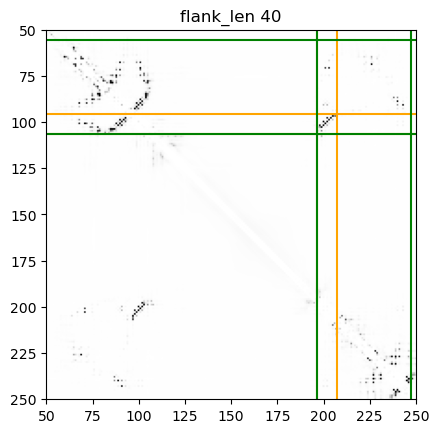

In [29]:
plt.imshow(mask_contact_full,cmap="Greys",vmin=0,vmax=1)

#for masking 
plt.axhline(position[0]-5-0.5, color='orange')
plt.axhline(position[0]+5+0.5, color='orange')

plt.axvline(position[1]-5-0.5, color='orange')
plt.axvline(position[1]+5+0.5, color='orange')

plt.axhline(position[0]-5-0.5 - int(flank_len), color='green')
plt.axhline(position[0]+5+0.5, color='green')

plt.axvline(position[1]-5-0.5, color='green')
plt.axvline(position[1]+5+0.5 + int(flank_len), color='green')

plt.title('flank_len ' + flank_len)
plt.xlim(50, 250) 
plt.ylim(250, 50)
plt.show()

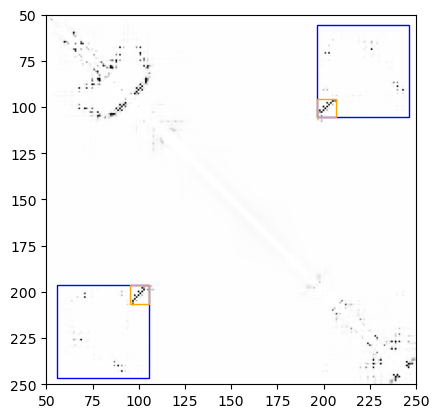

In [30]:
#plt.savefig('figures_manuscript/3CKC_esm2contact_fl' + flank_len + '.svg')

fig, ax = plt.subplots()
ax.imshow(mask_contact_full,cmap="Greys",vmin=0,vmax=1)
plt.xlim(50, 250) 
plt.ylim(250, 50)


rect1 = patches.Rectangle((position[1]-5-0.5, position[0]-5-0.5 - int(flank_len)), 10 + int(flank_len), 10 
                          + int(flank_len), linewidth=1, 
                         edgecolor='blue', facecolor="none") 
rect2 = patches.Rectangle((position[1]-5-0.5, position[0]-5-0.5), 10, 10, linewidth=1, 
                         edgecolor='orange', facecolor="none") 

rect3 = patches.Rectangle((position[0]-5-0.5 - int(flank_len), position[1]-5-0.5), 10 + int(flank_len), 10 
                          + int(flank_len), linewidth=1, 
                         edgecolor='blue', facecolor="none") 
rect4 = patches.Rectangle((position[0]-5-0.5, position[1]-5-0.5), 10, 10, linewidth=1, 
                         edgecolor='orange', facecolor="none") 


# Add the patch to the Axes 
ax.add_patch(rect1) 
ax.add_patch(rect2) 
ax.add_patch(rect3) 
ax.add_patch(rect4) 
plt.savefig('../figures_manuscript/' + name + '_esm2contact_fl' + flank_len + '_crop.svg')
plt.show() 

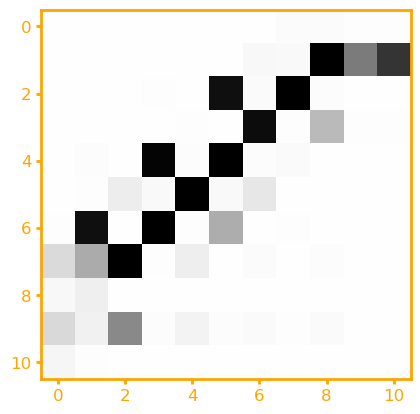

In [31]:
fig, ax = plt.subplots()
ax.imshow(mask_contact_full[position[0]-5:position[0]+6,position[1]-5:position[1]+6], cmap="Greys", vmin=0, vmax=1)
ax.spines['bottom'].set_color('orange')
ax.spines['top'].set_color('orange')
ax.spines['left'].set_color('orange')
ax.spines['right'].set_color('orange')
ax.xaxis.label.set_color('orange')
ax.yaxis.label.set_color('orange')
ax.tick_params(axis='x', colors='orange')
ax.tick_params(axis='y', colors='orange')

for spine in ax.spines.values():
    spine.set_linewidth(2)  
ax.tick_params(width=2) 

ax.xaxis.label.set_fontsize(14)  
ax.yaxis.label.set_fontsize(14)  
ax.tick_params(axis='both', labelsize=12)  

#plt.savefig('figures_manuscript/' + name + '_esm2contact_fl' + flank_len + 'zoomin.svg')

plt.show()